## Step -1: Business Problem
- Develop a predictive model to identify whether mushroom is good or poisonous based on various features of mushrooms.
- A general guidline for features, people should look out for when picking mushrooms

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
intp = df.drop('class', axis=1)
outp = df['class']

In [9]:
X = pd.get_dummies(intp, drop_first=True)
y = pd.get_dummies(outp, drop_first=True)

#### Train/Test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Adaboost
#### Applying hyperparameter tuning for identifying best parameters for adaboost

In [11]:
from sklearn.model_selection import GridSearchCV
# model/estimator 
from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier()

# parameter grid
param_grid_ab = {'n_estimators':list(range(1, 51))}

# grid search
grid_ab = GridSearchCV(estimator_ab, param_grid_ab, cv=5, scoring='accuracy')
grid_ab.fit(X_train, y_train)
# best parameters for AdaBoost Model
grid_ab.best_params_

{'n_estimators': 20}

#### Ada boost model important features

In [22]:
feats_ab = pd.DataFrame(data = grid_ab.best_estimator_.feature_importances_,
                       index=X.columns, columns=['Importance'])
imp_features_ab = feats_ab[feats_ab['Importance']>0].index.to_list()
imp_features_ab

['cap-color_w',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_n',
 'spore-print-color_r',
 'spore-print-color_w',
 'population_c',
 'population_v']

## AdaBoost Classifier
#### with important features & best parameters

In [13]:
# important input variables
X_imp = X[imp_features_ab]

# train_test split
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_imp, y, test_size=0.2, random_state=101)

# modelling
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=20)
ada.fit(X_test_ab, y_test_ab)

# prediction 
ypred_train_ab = ada.predict(X_train_ab)
ypred_test_ab = ada.predict(X_test_ab)

# evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train_ab, ypred_train_ab))
# cross validation
from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(ada, X_train_ab, y_train_ab, cv=5).mean())
print('Test accuracy:', accuracy_score(y_test_ab, ypred_test_ab))

Train accuracy: 1.0
Cross Validation: 1.0
Test accuracy: 1.0


## Gradient Boosting
#### Apply hyperparameter tuning for identifying best parameters for gradient boost

In [14]:
from sklearn.model_selection import GridSearchCV

# model/estimator
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

param_grid = {'n_estimators':[1, 5, 2],
                 'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 1]}

# grid search
grid_gb = GridSearchCV(estimator_gb, param_grid, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

# best parameters for GradientBoost model
grid_gb.best_params_

{'learning_rate': 1, 'n_estimators': 5}

#### Gradient Boost Model important features

In [15]:
feats_gb = pd.DataFrame(data=grid_gb.best_estimator_.feature_importances_, 
                        index=X.columns, 
                        columns = ['Importance'])

imp_features_list_gb = feats_gb[feats_gb['Importance']>0].index.to_list()
imp_features_list_gb

['cap-shape_x',
 'cap-surface_g',
 'cap-surface_s',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'stalk-root_c',
 'stalk-root_r',
 'stalk-surface-below-ring_y',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_n',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_r',
 'spore-print-color_u',
 'spore-print-color_w',
 'habitat_p']

## Gradient Boost Classifier
#### with important features & best parameters

In [16]:
X_imp = X[imp_features_list_gb]
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size=0.2, random_state=101)

# Modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=5,learning_rate=1)
gb.fit(X_train_gb, y_train_gb)

# prediction 
ypred_train_gb = gb.predict(X_train_gb)
ypred_test_gb = gb.predict(X_test_gb)

# evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train_gb, ypred_train_gb))
# cross validation
from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(gb, X_train_ab, y_train_ab, cv=5).mean())
print('Test accuracy:', accuracy_score(y_test_gb, ypred_test_gb))

Train accuracy: 0.9995383905216187
Cross Validation: 0.9998461538461537
Test accuracy: 0.9993846153846154


## XG Boosting
#### Apply hyperparameter tuning for identifying best parameters for XG Boost

In [17]:
from sklearn.model_selection import GridSearchCV

# model/estimator
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

param_grid = {'n_estimators':[1, 5, 2],
                 'max_depth':[3, 4, 5],
             'gamma':[0, 0, 15, 0.3, 0.5, 1]}

# grid search
grid_xgb = GridSearchCV(estimator_xgb, param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

# best parameters for GradientBoost model
grid_xgb.best_params_

{'gamma': 0, 'max_depth': 4, 'n_estimators': 5}

#### XGBoost Model important features

In [18]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_, 
                        index=X.columns, 
                        columns = ['Importance'])

imp_features_list_xgb = feats_xgb[feats_xgb['Importance']>0].index.to_list()
imp_features_list_xgb

['bruises_t',
 'odor_f',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-root_c',
 'stalk-root_r',
 'stalk-surface-below-ring_y',
 'spore-print-color_r',
 'spore-print-color_u']

## Xtreme GradientBoost Classifier
#### with important features & best parameters

In [19]:
X_imp = X[imp_features_list_gb]
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size=0.2, random_state=101)

# Modelling
from xgboost import XGBClassifier
gb = XGBClassifier(gamma= 0, max_depth= 4, n_estimators= 5)
gb.fit(X_train_gb, y_train_gb)

# prediction 
ypred_train_gb = gb.predict(X_train_gb)
ypred_test_gb = gb.predict(X_test_gb)

# evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train_gb, ypred_train_gb))
# cross validation
from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(gb, X_train_ab, y_train_ab, cv=5).mean())
print('Test accuracy:', accuracy_score(y_test_gb, ypred_test_gb))

Train accuracy: 0.9990767810432374
Cross Validation: 0.9990768046426245
Test accuracy: 0.9987692307692307


## Final Model

In [20]:
ada = AdaBoostClassifier(n_estimators=20)

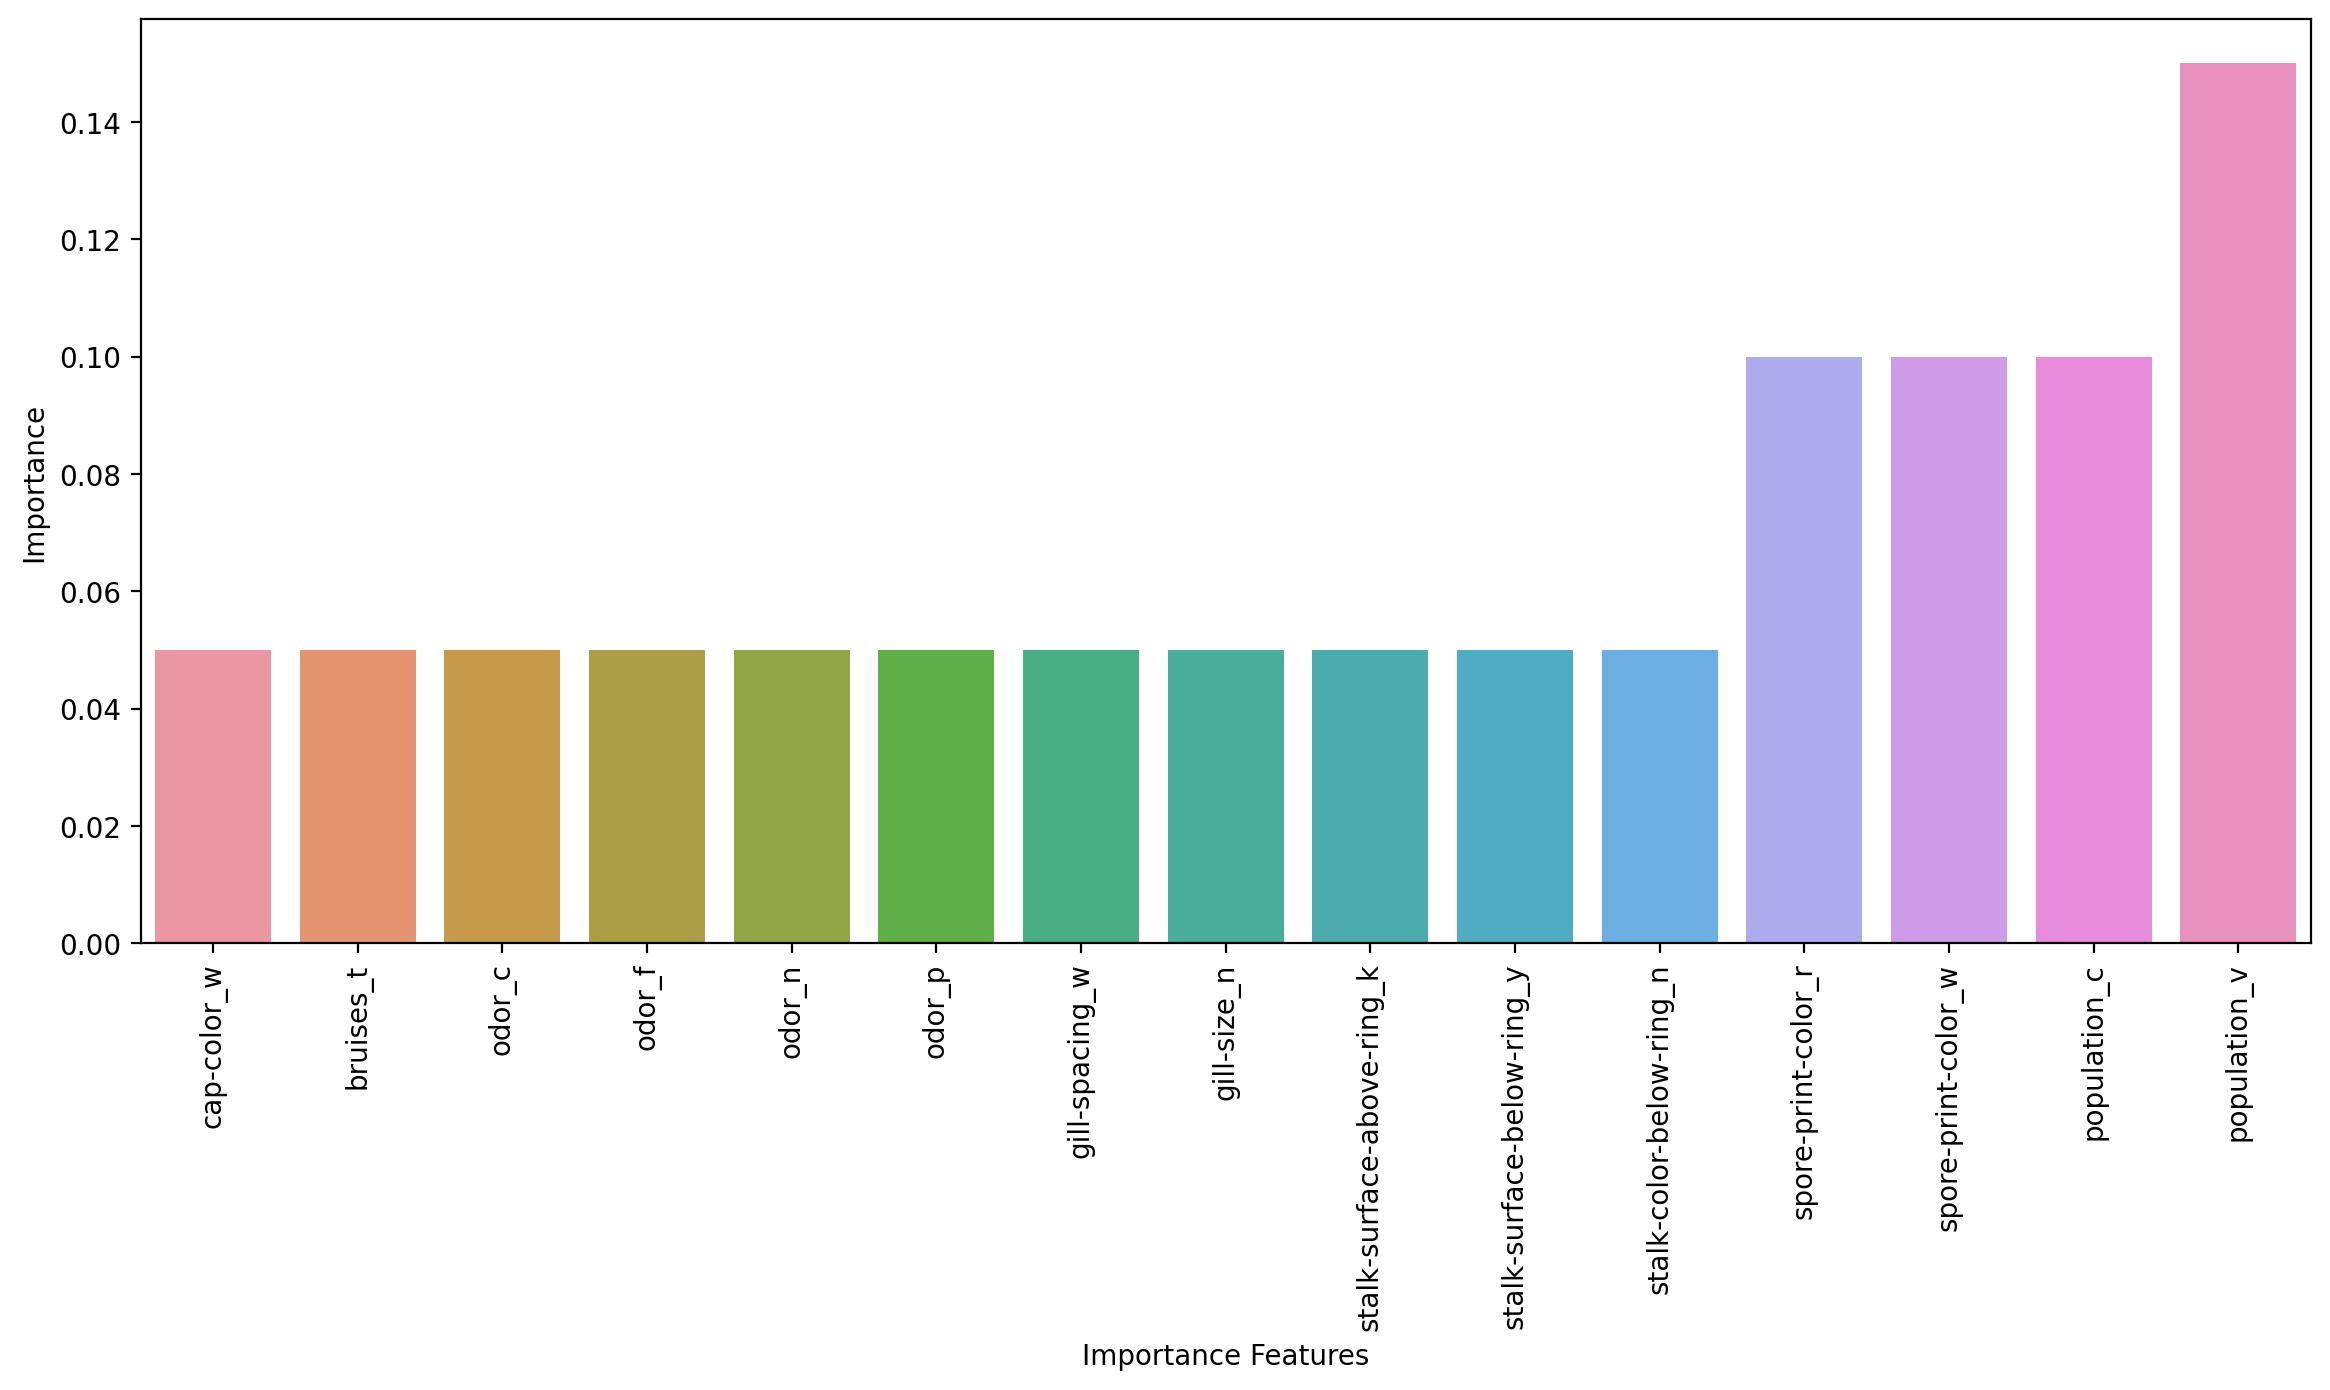

In [21]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data = feats_ab[feats_ab['Importance']>0].sort_values('Importance'),
           x=feats_ab[feats_ab['Importance']>0].index,
           y='Importance')

plt.xticks(rotation=90)
plt.xlabel('Importance Features')
plt.show()